# Data Analysis for Ford GoBike System 
## by Huu Tri Nguyen

## Preliminary Wrangling

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. The company begins operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system was officially launched as Ford GoBike in a partnership with Ford Motor Company.

In regards to how the system works, it is very similar to other bike share systems. They are bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. These bikes are available for use 24/7 to all members of the system

## Part I - Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

Data used for this analysis:

https://s3.amazonaws.com/fordgobike-data/index.html

In [2]:
df = pd.read_csv('201904-fordgobike-tripdata.csv')

## Part II - Assessing  Data

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.2+ MB


In [5]:
# Check if duplicates exist
df.duplicated().sum()

0

In [6]:
# Check for Nan values
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id              64
start_station_name            64
start_station_latitude         0
start_station_longitude        0
end_station_id                64
end_station_name              64
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          11199
member_gender              11199
bike_share_for_all_trip        0
dtype: int64

In [7]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000,227912.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493,1984.863250
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333,9.953144
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000,1878.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000,1980.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000,1987.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000,1992.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000,2001.000000


#### Quality issues

- start time and end time are objects not a timestamps
- user type and bike_share_for_all_trip can be set to category
- we can calculate the distance for rides between stations
- we can add more details from start_time and end_time with more details such as date, years and hours
- Rows containing null data for member_birth_year and member_gender should be removed
- Member birth year is in the float format, but should be converted to integer format

## Part III - Cleaning Data

In [8]:
# Create copies of original DataFrames
df_clean = df.copy()

In [9]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
# set user type, and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [11]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [12]:
#Check data type
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null datetime64[ns]
end_time                   239111 non-null datetime64[ns]
start_station_id           239111 non-null object
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239111 non-null object
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null object
user_type                  239111 non-null category
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    239111 non-null category
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), obj

##### Extract more time format from start_time and end_time into 

In [13]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [14]:
# extract start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [15]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

In [16]:
#check the dataframe
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_day,start_time_hour
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No,Tue,30,22
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No,Tue,30,20
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No,Tue,30,10
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No,Tue,30,10
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No,Tue,30,23


#### Rows containing null data for member_birth_year and member_gender should be removed

In [17]:
#dropping the all rows containing null data
df_clean.dropna(inplace=True)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 19 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null datetime64[ns]
end_time                   227848 non-null datetime64[ns]
start_station_id           227848 non-null object
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null object
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null object
user_type                  227848 non-null category
member_birth_year          227848 non-null float64
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null category
start_time_weekday         227848 non-null object
start_time_day 

### we can calculate the distance for rides between stations
Haversine formula used to calculate distances using latitude and longitude

https://www.movable-type.co.uk/scripts/latlong.html

In [19]:
#create a function to calculate distance (in kilometers)
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [20]:
# Using the calcuated math on our columns for lat and long
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [21]:
#check the result
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_day,start_time_hour,distance_km
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No,Tue,30,22,1.025420
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No,Tue,30,10,0.000000
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No,Tue,30,10,1.347458
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No,Tue,30,23,2.616046
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997.0,Male,No,Tue,30,23,1.029574


######  Member birth year is in the float format, but should be converted to integer format

In [22]:
#converting birth year to integer
df_clean.member_birth_year = df_clean.member_birth_year.astype('int64')

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 20 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null datetime64[ns]
end_time                   227848 non-null datetime64[ns]
start_station_id           227848 non-null object
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null object
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null object
user_type                  227848 non-null category
member_birth_year          227848 non-null int64
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null category
start_time_weekday         227848 non-null object
start_time_day   

In [24]:
#adding a member age column
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [25]:
#test
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_day,start_time_hour,distance_km,member_age
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,...,2749,Subscriber,1989,Female,No,Tue,30,22,1.025420,30
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,...,258,Subscriber,1993,Male,No,Tue,30,10,0.000000,26
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,...,1974,Subscriber,1972,Male,No,Tue,30,10,1.347458,47
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,...,877,Subscriber,1973,Male,No,Tue,30,23,2.616046,46
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,...,3234,Customer,1997,Male,No,Tue,30,23,1.029574,22


In [26]:
df_clean.member_age.describe()

count    227848.000000
mean         34.137552
std           9.953599
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

It looks like 75% of the user is under 40 years old

In [27]:
df_clean.member_age.describe(percentiles = [.99])

count    227848.000000
mean         34.137552
std           9.953599
min          18.000000
50%          32.000000
99%          63.000000
max         141.000000
Name: member_age, dtype: float64

99% of the user is under the age of 64. Outlier above 64 (1%) should be removed

In [28]:
# Only keep the events where people are under 64 years of age
df_clean = df_clean.query('member_age <= 64')

In [29]:
# save cleaned data 
df_clean.to_csv('clean_master_file.csv', index=False)

### What is the structure of your dataset?

The dataset contained features about:

trip duration: start/end time, how long the trip took in seconds
stations: start/end station, name, geolocation (latitude/longitude)
user type
rented bikes: bike id
The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:

rental time: month, day, hour of the day, weekday (both for start and end date)

The following columns were added:

- start_time_weekday	
- start_time_day
- start_time_hour
- distance_km
### What is/are the main feature(s) of interest in your dataset?

- When and where bikes are high in demand (during the day/weekday/month)
- Which type of user use the service most (customer vs subscriber)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Start time, location and datetime probably might have the most notable effect on bike demand

## Univariate Exploration

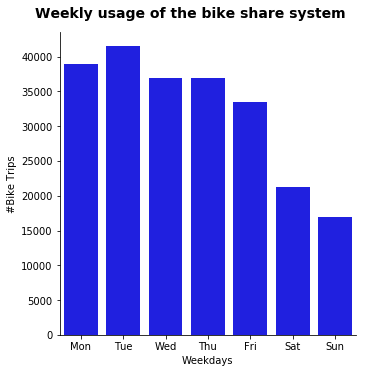

In [30]:
# weekday usege of the bike sharing system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', kind='count', color = 'blue', order = weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

The bike share system is mainly used during weekdays, with Tuesday as the most popular day. The system is most probably used as a daily work/school commute.

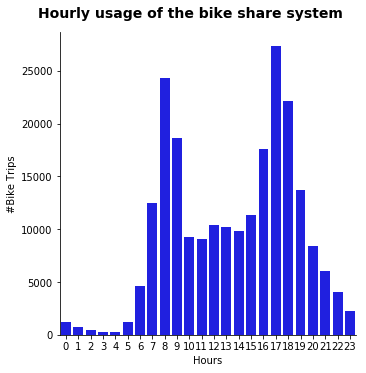

In [31]:
# hourly usage of the bike sharing system

g = sb.catplot(data=df_clean, x='start_time_hour', kind='count', color = 'b')
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and gat back from work.

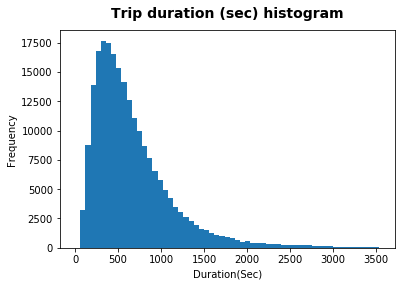

In [32]:
# histogram for duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration(Sec)')
plt.ylabel('Frequency');

Looking at the histogram, we can see that trip durations are no longer than 33 min (2000 sec) and usually last 6 to 15 min. 
Most people seems to use it for roughly 15 mins (1000 secs)

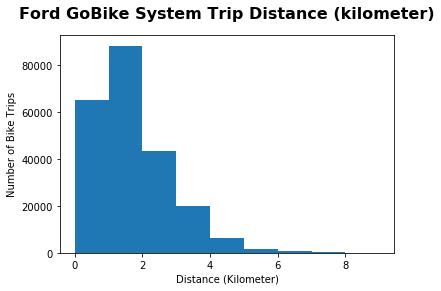

In [33]:
# Distance in kilometers traveled
bin_edges = np.arange(0, 10, 1)

plt.hist(data = df_clean, x = 'distance_km', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance (kilometer)", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Kilometer)')
plt.ylabel('Number of Bike Trips');

It looks like that the majority of the trip is between 0 - 2 km

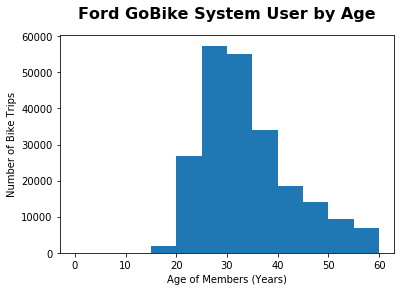

In [57]:
# Usage by age
bin_edges = np.arange(0, 64, 5)

plt.hist(data = df_clean, x = 'member_age', bins = bin_edges);

plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

The histogram shows the majority of users fall between the ages of 25 - 40 years, which is also the same age range of working adults.

In [35]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,start_time_day,start_time_hour,distance_km,member_age
count,226077.000000,226077.000000,226077.000000,226077.000000,226077.000000,226077.000000,226077.000000,226077.000000,226077.000000,226077.000000
mean,772.153855,37.768968,-122.351245,37.766270,-122.341636,1985.163121,13.850520,13.656524,2.797004,33.836879
std,1827.679920,0.130275,0.284137,0.352441,1.098276,9.325822,8.573385,4.782962,117.283053,9.325822
min,61.000000,0.000000,-122.453704,0.000000,-122.453704,1955.000000,1.000000,0.000000,0.000000,18.000000
25%,346.000000,37.770083,-122.413004,37.770407,-122.411738,1980.000000,7.000000,9.000000,0.924061,27.000000
50%,553.000000,37.780760,-122.398279,37.780955,-122.397437,1987.000000,12.000000,14.000000,1.464180,32.000000
75%,865.000000,37.797280,-122.288665,37.797673,-122.290230,1992.000000,22.000000,18.000000,2.278221,39.000000
max,86114.000000,37.880222,0.000000,37.880222,0.000000,2001.000000,30.000000,23.000000,12798.346860,64.000000


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Looks at the statistics again. The 75% percentile for duration_sec is 865 seconds but the maximum in 86114 (i.e: 24 hours)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

None

## Bivariate Exploration

In this section I will further explore the dataset by adding the customer type to the analysis.

In [36]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

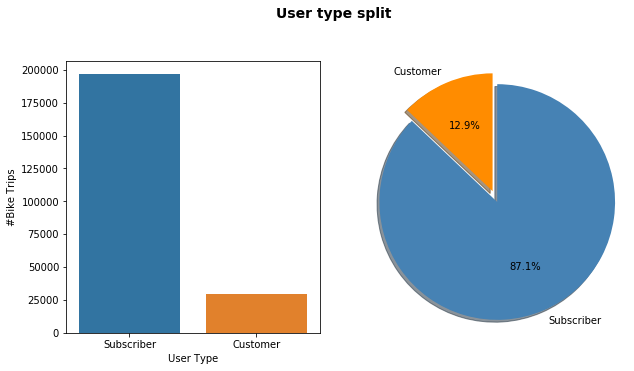

In [55]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split ', y=1.03, fontsize=14, fontweight='semibold');

The bike sharing system is mainly used by subscribers (87.1%) than ocassional riders (12.9%).



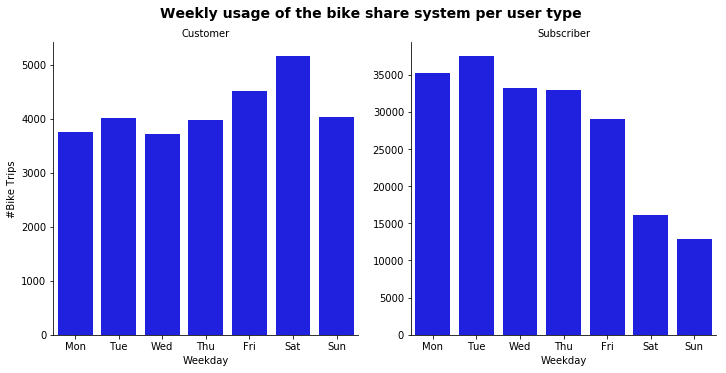

In [38]:
# weekday usage of the bike sharing system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = 'b', order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

Subscribers appears to use bikes more than customer during weekday. On the other hands, customers seem to use the bike about the same amount through out the week, including weekend trips

This may be explained that most subscribers use the bikes mainly for daily work/school commute, whereas customers are tourists who do not get affected by the working/school hour, hence the equally usage everday 

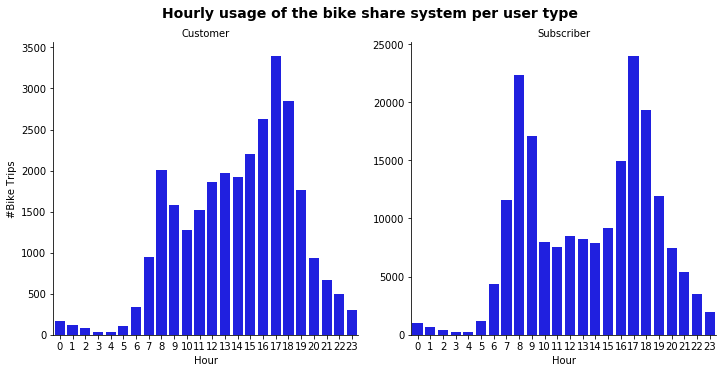

In [39]:
# hourly usage of the bike sharing system per user type

g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = 'b')
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

The only difference we can observe from the 2 graphs above is that customer use the bike more between 9am to 4pm. This further reinforce our hypothesis that subsribers use it for commuting to work/school since they would not be using it during the work hour

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


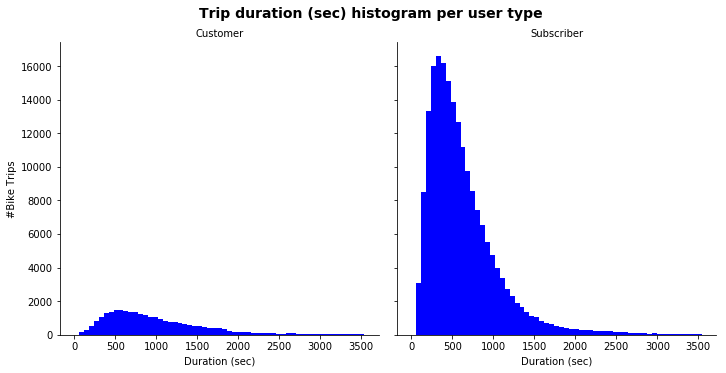

In [47]:
# duration (sec) distribution per user type

g = sb.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color='b', bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

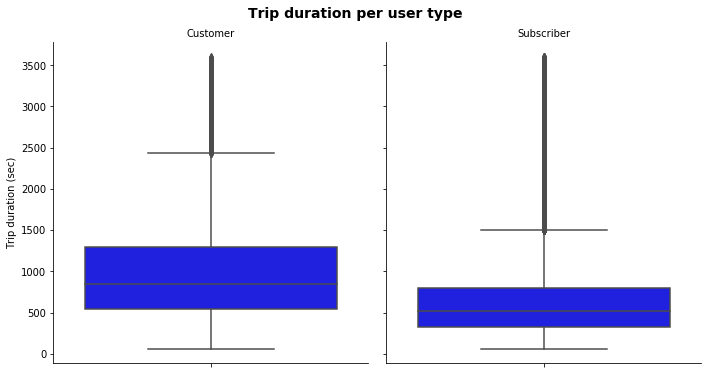

In [41]:
# distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sb.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = 'b')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration per user type', y=1.03, fontsize=14, fontweight='semibold');

Looking at both charts (histograms and box plots), it appear that trip durations are longer for customers than for it is for subscribers

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


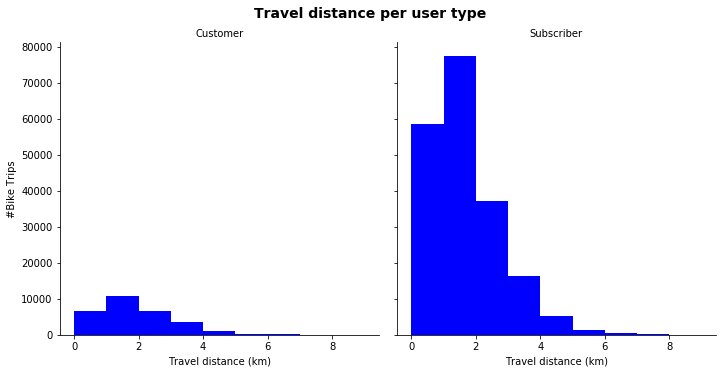

In [42]:
# travel distance per user type
g = sb.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 10, 1)
g.map(plt.hist, "distance_km", color='b', bins=bin_edges)
g.set_axis_labels("Travel distance (km)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Travel distance per user type', y=1.03, fontsize=14, fontweight='semibold');

The distance seems to be corresponding to the travel duration as both graph have similar shape. Most subscriber travel between 1 - 2 km whereas the distance is varied more evenly between 0 - 4 km

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Customers are likely to be casual riders or tourists, they tend to use it more often throughout the week and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm)

Subscribers are daily commuters, they rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Customers trips are usually longer than for subscribers, most probably because they prefer bike rides  around the area, which  encourages longer trips. 

Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

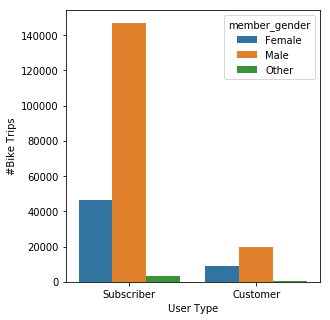

In [43]:
plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)

g = sb.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

Overall, it can be seen that males are using the system much more than female. However, the discrepancy between males and females are much greater for subscriber than it is for customer. 

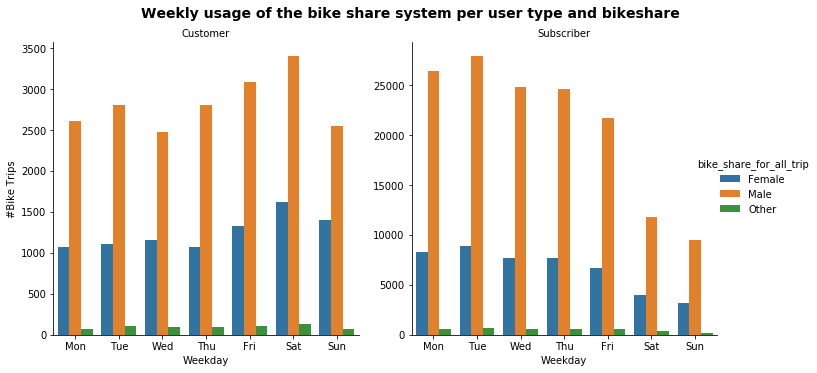

In [44]:
# weekday usage of the bike sharing system 

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('bike_share_for_all_trip')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and bikeshare', y=1.03, fontsize=14, fontweight='semibold');

The trend for both females and males appear to be very similar. Regardless of genders, subscribers tend to use the system more on the weekdays rather than the weekend. And vice versa, customer use the system about the same amount of any day of the week.

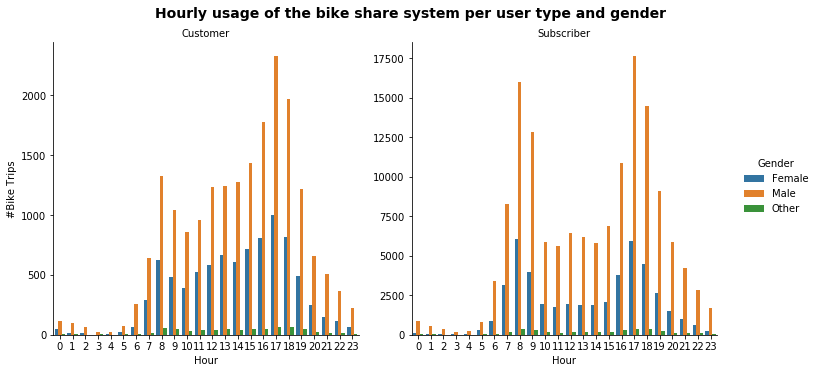

In [45]:
# hourly usage of the bike sharing system per user type and gender

g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

Again, the pattern for males and females are very similar. This further indicates that gender doesn't affect the demand for bike usage

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


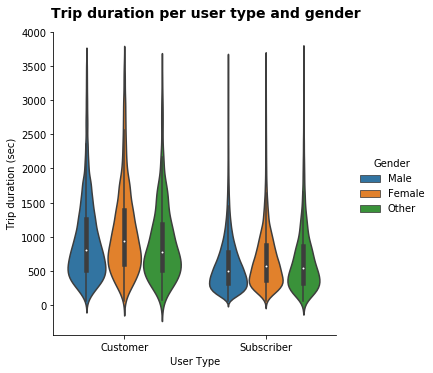

In [49]:
# code for the (violinplot) duration (sec) distribution per user type and gender
g = sb.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration (sec) per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

Looking at the interquartile range for both customer and subscriber, it can be seen that female generally will take longer trip (measured in seconds) than their males counterpart. The difference between the two are quite minimal, however.

One possible explanation for this difference is because males are physically stronger than females, hence the time taken for theit trip might be slighly shorter than females'. This again means that gender is unlikely to affect bike usage.

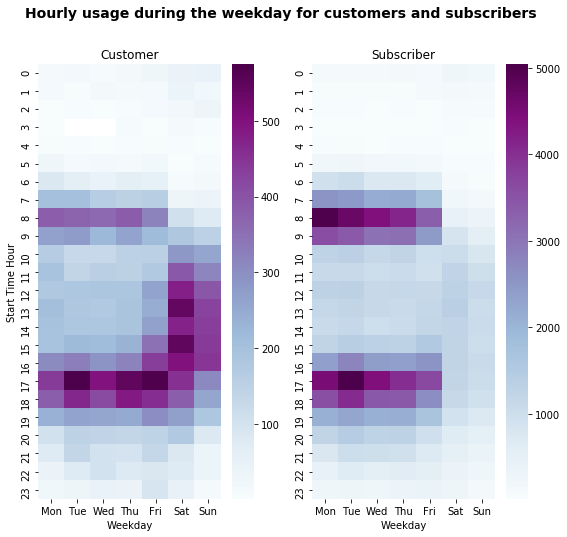

In [54]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

## Summary

Observation:

- The majority of users for this system are subscribers (87.1%)
- Majority of users are between the working age of 20 - 40 years old
- Customers use the bike sharing system equally on any day of the week. On the other hand, subscribers tend to use the system more on weekdays with relatively low usage on the weekend
- As depited by the histogram in the bivariables analysis and the heat map above. Between 9am - 4pm, which are working hours, customer generally has higher bike usage than subscribers. Additionally, bike usage for subscribes is also much higher between 8-9am (waking hour/work start hour)
- Customer generally take longer trips than subscribers, both in terms of travel duration and distance (km)
- There are a higher male-to-female ratio for subscribers than customers
- Genders do not appear to affect bike usage in anyway as both males and females have very similar usage pattern

Conclusion:

- Subscribers are likely people who use it for school and work commute, this is supported by the fact that they generally take shorter and quicker trips. Additionally, they have the highest bike usage before 9am and after 5pm, and very low usage between 9am - 5pm, which makes sense as these people do not use the system during work hour
- Customers are likely to be tourists, this is supported by the fact that they take longer trips and the usage is not constrained by day of the week or working hour.
- Male are generally more likely to use and become the member of the system as shown by the male-to-female ratio in terms of number of users and subscriber

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The heatmap didn't reveal anything new for the time based discussion on when and what time each user group uses the bike sharing system.  Customers use the system at almost the opposite time as the Subscribers.

### Were there any interesting or surprising interactions between features?

I have also checked if there is a trend difference for genders for each user group. There are not much of the differences in trends

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!